In [23]:
import numpy as np # arrays and working with them
import matplotlib.pyplot as plt # for drawing plots
import mpl_toolkits.mplot3d.axes3d as axes3d # for drawing 3D plots
from matplotlib import cm # for drawing 3D plots
import seaborn # for drawing heatmaps
import math # has sin, cos
import cmath # has complex math like exp

<h2>Generating pure signal and its Fourier transform</h2>

In [55]:
N = 30
T = 2 * math.pi
pure_signal = np.empty([30, 30])
for t1 in range(0, N):
    for t2 in range(0, N):
        pure_signal[t1][t2] = math.sin((t1 + t2) / N * T)

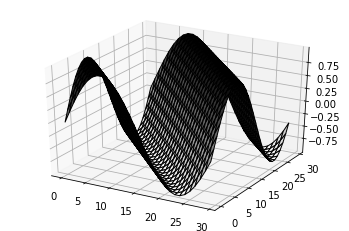

In [57]:
# Pure sine signal
x_, y_ = np.meshgrid(np.arange(N), np.arange(N)) # those coordinates are used for drawing
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(x_, y_, pure_signal, cmap=cm.binary, edgecolor='black')

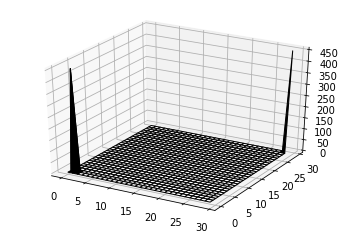

In [26]:
# Its Fourier transform
from scipy.fft import fft2, ifft2 # 2D Fourier transforms
spectr = fft2(pure_signal)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(x_, y_, abs(spectr), cmap=cm.binary, edgecolor='black')

<h2>Generating random signals (adding the noise) and their ESD</h2>

In [30]:
# Let's add noise to a signal
signal1 = signal + np.random.normal(0,0.5,[N, N])
signal2 = signal + np.random.normal(0,0.5,[N, N])

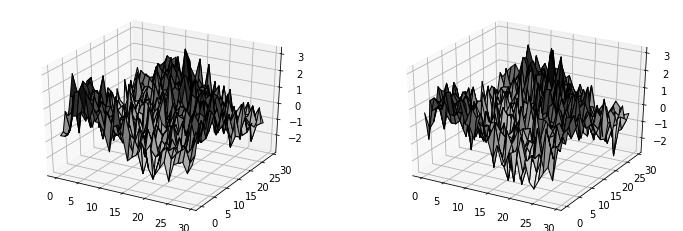

In [49]:
# Drawing noisy signals
fig, ax = plt.subplots(1, 2, figsize=(12, 4), subplot_kw=dict(projection='3d'))
ax[0].plot_surface(x_, y_, signal1, cmap=cm.binary, edgecolor='black')
ax[1].plot_surface(x_, y_, signal2, cmap=cm.binary, edgecolor='black')

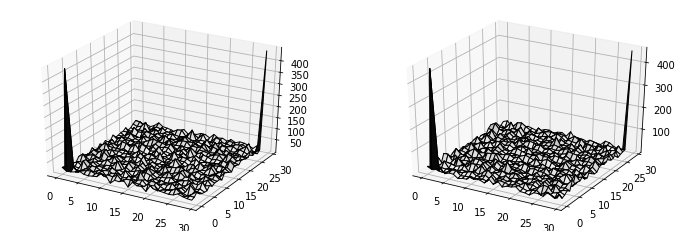

In [51]:
# Their Fourier transforms
spectr1 = fft2(signal1)
spectr2 = fft2(signal2)
fig, ax = plt.subplots(1, 2, figsize=(12, 4), subplot_kw=dict(projection='3d'))
ax[0].plot_surface(x_, y_, abs(spectr1), cmap=cm.binary, edgecolor='black')
ax[1].plot_surface(x_, y_, abs(spectr2), cmap=cm.binary, edgecolor='black')

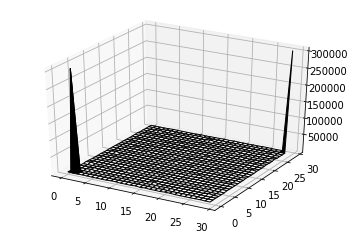

In [54]:
# Let's get an ESD - Energy Spectral Density
ESD = abs(spectr1)**2 + abs(spectr2)**2 / 2
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(x_, y_, ESD, cmap=cm.binary, edgecolor='black')

<h2>Spectral simulation</h2>
<br>
In the code below you'll see the line <i>signal_gen[t1][t2] += #♥</i> -- the simulation formula should be put there:
<img src='formula.png'></img>
<br>
You just have to implement what is highlighted in red and put it in the place of #♥<br>
instead of exp(j...) use cmath.exp(1j * ...)<br>
instead of N1 and N2 put N<br>
multiply it by random coefficients rc[k1][k2] to generate random signals (you'll have signal_gen[t1][t2] += XF[k1][k2] * rc[k1][k2] * ...)

In [78]:
# Spectral simulation
# generating Fourier coefficients - actually just sqrt of the ESD normalized
XF = np.sqrt(ESD)
XF /= XF.max()
# generating random coefficients (rc)
rc = np.random.normal(0,1,[N//2, N//2])
rc /= abs(rc) # rc are just random signs - they are either +1 or -1
import cmath
# generating a signal
signal_gen = np.empty([N, N], dtype=complex)
for t1 in range(0, N):
    for t2 in range(0, N):
        signal_gen[t1][t2] = 0
        for k1 in range(0, N//2):
            for k2 in range(0, N//2):
                signal_gen[t1][t2] += #♥

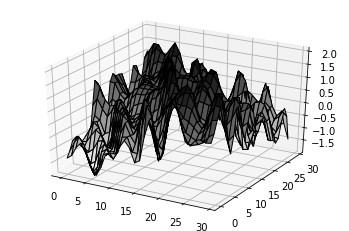

In [79]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(x_, y_, signal_gen.real, cmap=cm.binary, edgecolor='black')
# saving a signal
#fig.savefig('generatedsignal.png', dpi=600)
#np.savetxt("generatedsignal.csv", signal_gen.real, delimiter=",")

<h2>Image simulation</h2>

In [ ]:
# Loading in pictures
from PIL import Image
import numpy as np
pic_size = 50 #pic size (assuming they are square) in pixels
pic_num = 5 #how many pics
img = []
pix = [] #array of pictures
pix_ft = [] #array of FTs
for i in range(pic_num):
    iname = "pic" + str(i + 1) + ".bmp" # if you just save pics into the same folder as pic0.bmp, pic1.bmp,... pic4.bmp
    # Theoretically you can change .bmp for .png
    img.append(Image.open(iname).convert('L'))
    pix.append(np.asarray(img[i]))
    pix_ft.append(fft2(pix[i]))
# Forming an ESD
ESD_pic = np.empty([pic_size, pic_size])
for i in range(0, pic_size):
    for j in range(0, pic_size):
        ESD_pic[i][j] = 0
        for k in range(5):
            ESD_pic[i][j] += abs(pix_ft[k][i][j])**2
        ESD_pic[i][j] = sp_res[i][j] / pic_num
# Then you can simulate from that ESD

In [ ]:
# Copy simulation here

<br><br>
<h1>Bonus info</h1>

<h2>1 Simple 1D signal fourier transform</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from matplotlib import cm
import seaborn
import math

In [79]:
# Period
T = 2 * np.pi
# Number of sample points
N = 100
t = np.linspace(0.0, T, N, endpoint=False) #just an array like [0, T/N, 2T/N, ... , T]
# first sine
x1 = np.sin(t)
# second sine
x2 = np.sin(t * 8)

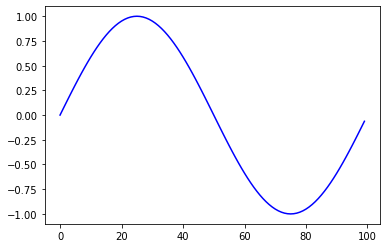

In [91]:
# Drawing and saving the first sine
plt.plot(x1, 'b')
#plt.savefig('sine1.png', dpi=600) #saving a figure

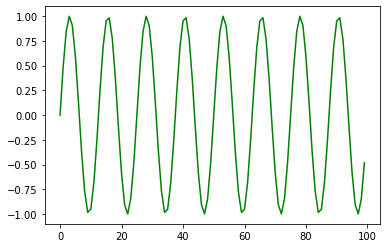

In [92]:
# Drawing and saving the second sine
plt.plot(x2, 'g')
#plt.savefig('sine2.png', dpi=600)

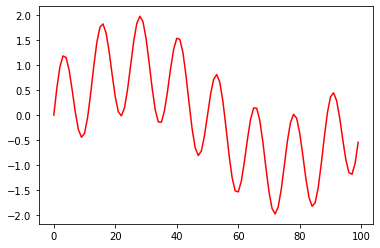

In [93]:
# Summing the sines and drawing the sum (the sum is the signal basically)
x = x1 + x2
plt.plot(x, 'r')
#plt.savefig('sig.png', dpi=600)

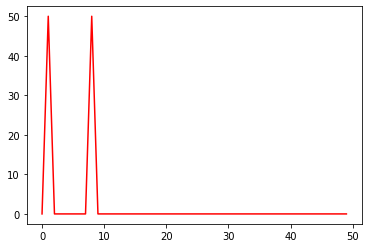

In [94]:
# Fourier transforming the sum
from scipy.fft import fft
X = fft(x)
plt.plot(abs(X[0:N//2]), 'r') # X is symmetrical so by [0:N//2] we're cutting it in half
#plt.savefig('X.png', dpi=600)

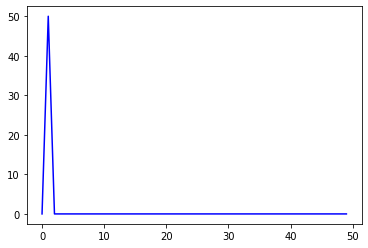

In [95]:
# First sine transformed
X1 = fft(x1)
plt.plot(abs(X1[0:N//2]), 'b') # X is symmetrical so by [0:N//2] we're cutting it in half
#plt.savefig('X1.png', dpi=600)

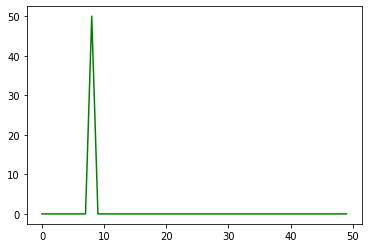

In [96]:
# Second sine transformed
X2 = fft(x2)
plt.plot(abs(X2[0:N//2]), 'g') # X is symmetrical so by [0:N//2] we're cutting it in half
#plt.savefig('X2.png', dpi=600)

<h2>2 Random 1D signals</h2>

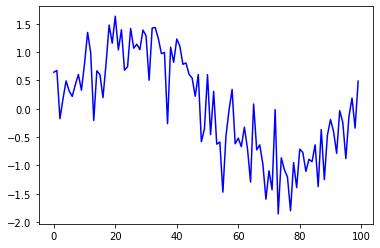

In [217]:
# Period
T = 2 * np.pi
# Number of sample points
N = 100
for i in range(0, N):
    j = i / N * T
t = np.linspace(0.0, T, N, endpoint=False)
# two noisy sines
x1 = np.sin(t) + np.random.normal(0,0.5,100)
x2 = np.sin(t) + np.random.normal(0,0.5,100)
plt.plot(x1, 'b')
#plt.savefig('x1_noisy.png', dpi=600)

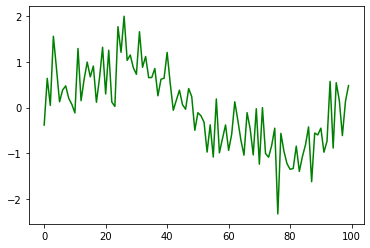

In [218]:
plt.plot(x2, 'g')
#plt.savefig('x2_noisy.png', dpi=600)

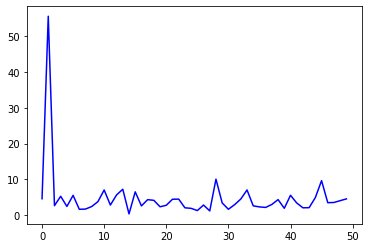

In [219]:
# First sine transformed
from scipy.fft import fft
X1 = fft(x1)
plt.plot(abs(X1[0:N//2]), 'b') # X is symmetrical so by [0:N//2] we're cutting it in half
#plt.savefig('X1_noisy.png', dpi=600)

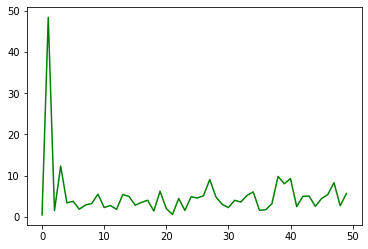

In [220]:
# First sine transformed
X2 = fft(x2)
plt.plot(abs(X2[0:N//2]), 'g') # X is symmetrical so by [0:N//2] we're cutting it in half
#plt.savefig('X2_noisy.png', dpi=600)

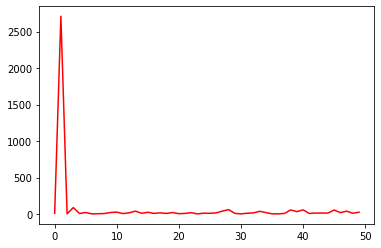

In [221]:
# Energy spectrum density
ESD = (np.square(abs(X1)) + np.square(abs(X2)))/2
AFFT = (abs(X1) + abs(X2))/2  # aggregate FFT can be used too
plt.plot(ESD[0:N//2], 'r')
#plt.savefig('esdf.png', dpi=600)

<h3>2.1 Shaping filters simulation</h3>

In [238]:
# Generate two noise signals n1 and n2
n1 = np.random.normal(0,1,100)
n2 = np.random.normal(0,1,100)
# Getting their Fourier transforms
N1 = fft(n1)
N2 = fft(n2)
# Multiplying their spectres with ESD (also normalizing ESD so that it's max is 1)
pass_ = ESD
Y1 = N1 * pass_
Y2 = N2 * pass_

In [239]:
# Inverse Fourier transforming results
from scipy.fft import ifft
y1 = ifft(Y1)
# also normalizing the results - I'm not sure if that's cheating
y1 /= y1.max()
y1 *= 1.5
y2 = ifft(Y2)
y2 /= y2.max()
y2 *= 1.5

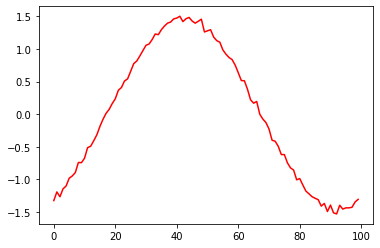

In [240]:
plt.plot(y1.real, 'r')
#plt.savefig('sig_n1.png', dpi=600)

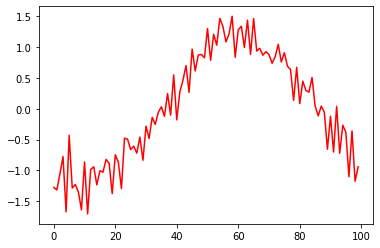

In [241]:
plt.plot(y2.real, 'r')
#plt.savefig('sig_n2.png', dpi=600)

<h3>2.2 Spectral simulation</h3>

In [354]:
XF = np.sqrt(ESD)
XF /= XF.max()

In [461]:
# turning noise into random signs
n3 = np.random.normal(0,1,50)
n3 /= abs(n3)
import cmath
z = np.empty([100], dtype=complex)
for i in range(0, 100):
    z[i] = 0
    for k in range(0, 50):
        # adding random signs to get random signals
        z[i] += XF[k] * n3[k] * cmath.exp(1j * k * i * math.pi / 75)

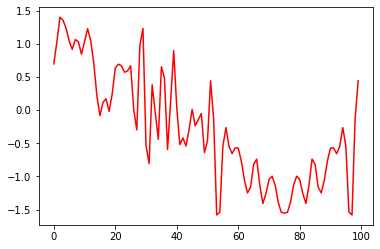

In [462]:
plt.plot(z.real, 'r')
#plt.savefig('sig_spec1', dpi=600)

<h1 align=center>Picture Simulation</h1>

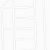

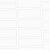

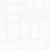

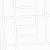

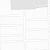

In [9]:
from PIL import Image
import numpy as np
img = []
pix = []
for i in range(5):
    iname = "miami" + str(i + 1) + ".bmp"
    img.append(Image.open(iname).convert('L'))
    pix.append(np.asarray(img[i]))
    display(img[i])

In [2]:
pix[0]

array([[251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       ...,
       [251, 251, 246, ..., 251, 251, 251],
       [251, 251, 244, ..., 251, 251, 251],
       [251, 251, 242, ..., 251, 251, 251]], dtype=uint8)

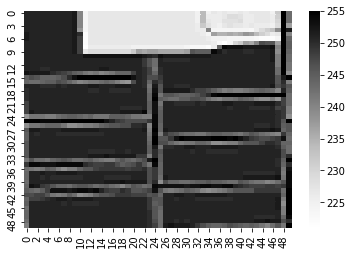

In [12]:
import seaborn
fig = seaborn.heatmap(pix[4], cmap="Greys")
fig.figure.savefig("city_-3.png", dpi=300)

In [7]:
from scipy.fft import fft2
pix_ft = []
for i in range(5):
    pix_ft.append(fft2(pix[i]))

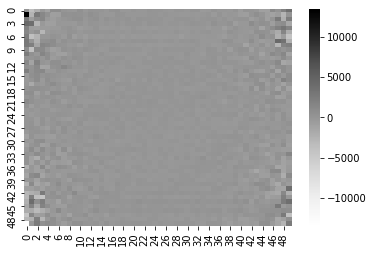

In [8]:
from matplotlib.colors import LogNorm, Normalize
seaborn.heatmap(pix_ft[1].imag, cmap="Greys")

In [6]:
import math
sp_res = np.empty([50, 50])
for i in range(0, 50):
    for j in range(0, 50):
        sp_res[i][j] = 0
        for k in range(5):
            sp_res[i][j] += abs(pix_ft[k][i][j])**2
        sp_res[i][j] = sp_res[i][j] / 5

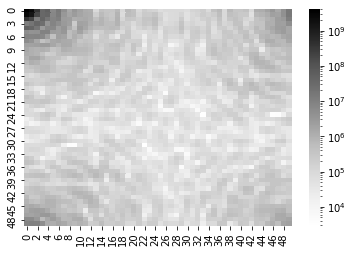

In [7]:
seaborn.heatmap(sp_res, cmap="Greys", norm=LogNorm())

In [8]:
np.savetxt("esdf.csv", sp_res, delimiter=",")

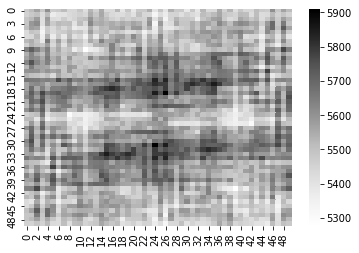

In [14]:
#sim_d=np.loadtxt("signal.csv", delimiter=";", skiprows=1, usecols=range(1,20))
#seaborn.heatmap(sim_d, cmap="Greys")
import pandas as pd
sim_d = pd.read_csv("rand2/miami1.csv", delimiter=",")
sim_d = sim_d.drop(sim_d.columns[0], axis=1)
fig = seaborn.heatmap(sim_d, cmap="Greys")
fig.figure.savefig("city_2.png", dpi=300)

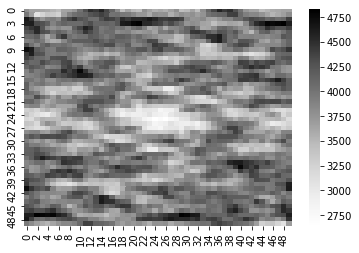

In [11]:
sim_r1 = pd.read_csv("rand1/cloud2.csv", delimiter=",")
sim_r1 = sim_r1.drop(sim_r1.columns[0], axis=1)
seaborn.heatmap(sim_r1, cmap="Greys")

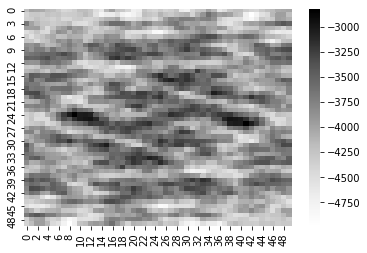

In [12]:
sim_r2 = pd.read_csv("rand2/cloud2.csv", delimiter=",")
sim_r2 = sim_r2.drop(sim_r2.columns[0], axis=1)
seaborn.heatmap(sim_r2, cmap="Greys")

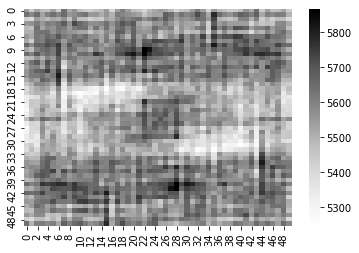

In [13]:
import pandas as pd
import seaborn
sim_d = pd.read_csv("rand1/miami1.csv", delimiter=",")
sim_d = sim_d.drop(sim_d.columns[0], axis=1)
seaborn.heatmap(sim_d, cmap="Greys")

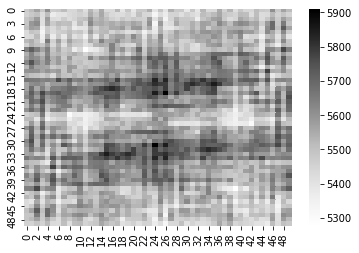

In [14]:
sim_d = pd.read_csv("rand2/miami1.csv", delimiter=",")
sim_d = sim_d.drop(sim_d.columns[0], axis=1)
seaborn.heatmap(sim_d, cmap="Greys")

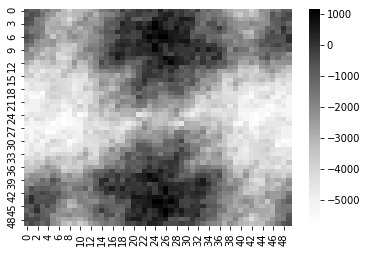

In [11]:
sim_d = pd.read_csv("rand1/sun1.csv", delimiter=",")
sim_d = sim_d.drop(sim_d.columns[0], axis=1)
seaborn.heatmap(sim_d, cmap="Greys")

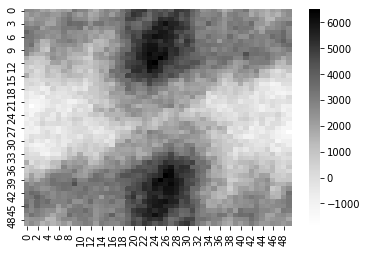

In [12]:
sim_d = pd.read_csv("rand2/sun1.csv", delimiter=",")
sim_d = sim_d.drop(sim_d.columns[0], axis=1)
seaborn.heatmap(sim_d, cmap="Greys")